# Estimación del cultivo

## Métricas de las variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#df = pd.read_csv(r'score/zafras_modelado.csv')
df21_r = pd.read_csv(r'score/zafra21_real.csv')
df22_r = pd.read_csv(r'score/zafra22_real.csv')
df23_r = pd.read_csv(r'score/zafra23_real.csv')
df21_m = pd.read_csv(r'score/zafra21_modelado.csv')
df22_m = pd.read_csv(r'score/zafra22_modelado.csv')
df23_m = pd.read_csv(r'score/zafra23_modelado.csv')
df_r = pd.read_csv(r'score/zafras_real.csv')
df_m = pd.read_csv(r'score/zafras_modelado.csv')

In [23]:
df21_r['zafra'] = 2021
df21_m['zafra'] = 2021
df22_r['zafra'] = 2022
df22_m['zafra'] = 2022
df23_r['zafra'] = 2023
df23_m['zafra'] = 2023

In [26]:
concat_reales = pd.concat([df21_r, df22_r, df23_r])
concat_modelados = pd.concat([df21_m, df22_m, df23_m])

In [22]:
df23_m.sort_values(by='R2', ascending=False)

,Variable,R2,P_values,MSE,Params,RMSE
10,etc_acum,0.211660,[0.02236865 0.25137095],205.706635,[ 9.24467856e+01 -2.59584773e-02],14.342477
9,lluvia_acum,0.198502,[0.01618298 0.26858643],192.919566,[ 8.54479694e+01 -7.24784694e-02],13.889549
8,msi_mean,0.127166,[0.71041127 0.74139072 0.72130344],61.794692,[ 294.10880113 -648.6862643 433.59106409],7.860960
1,ndvi_mean,0.047033,[0.25047652 0.60593569],45.710576,[ 94.91174666 -67.56780769],6.760960
4,cire_max,0.032729,[0.16210582 0.66812129],31.808124,[42.52033445 5.47192581],5.639869
0,ndvi_max,0.020840,[0.33312803 0.73305825],20.254280,[ 82.26195523 -37.13195903],4.500476
5,cire_mean,0.012487,[0.18736076 0.79221164],12.136241,[45.95647808 5.44121259],3.483711
6,ndre1_max,0.003825,[0.4178882 0.88433552],3.717260,[46.32011672 17.79667486],1.928020
7,ndre1_mean,0.003735,[0.30002043 0.88569513],3.629948,[ 62.63009846 -24.2616872 ],1.905242
2,gndvi_max,0.001361,[0.60834283 0.93088641],1.322888,[46.58988136 12.32858204],1.150169


<Figure size 1000x1000 with 0 Axes>

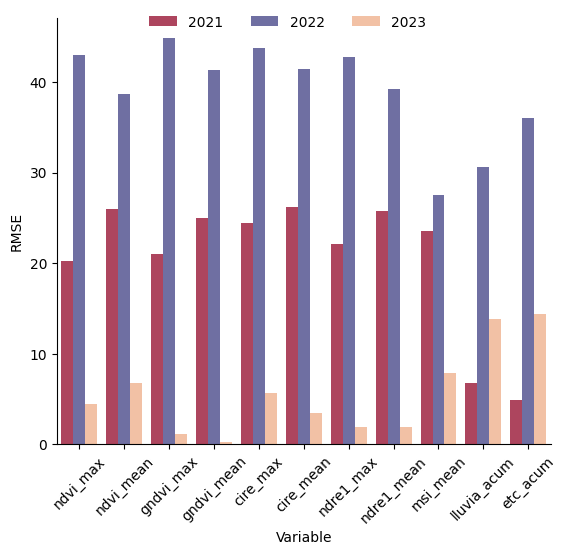

In [48]:
plt.figure(figsize=(10,10))
a = sns.catplot(data=concat_modelados, x='Variable', y='RMSE', kind='bar', hue='zafra', legend='auto', palette=sns.color_palette(['#BE3455', '#6667AB', '#FFBE98']))
sns.move_legend(a, loc='upper center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.xlabel('Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.savefig(r'../../tesis_img/yield_new/zafras_rmse_m.pdf', dpi=150)
plt.show()

## Modelo de regresion

In [2]:
rl21_r = pd.read_csv(r'predicts/zafra21_real.csv')
rl22_r = pd.read_csv(r'predicts//zafra22_real.csv')
rl23_r = pd.read_csv(r'predicts//zafra23_real.csv')
rl21_m = pd.read_csv(r'predicts//zafra21_modelado.csv')
rl22_m = pd.read_csv(r'predicts//zafra22_modelado.csv')
rl23_m = pd.read_csv(r'predicts//zafra23_modelado.csv')
rl_r = pd.read_csv(r'predicts//zafras_real.csv')
rl_m = pd.read_csv(r'predicts//zafras_modelado.csv')

In [25]:
rl23_m

,parcela,ndvi_max,ndvi_mean,gndvi_max,gndvi_mean,cire_max,cire_mean,ndre1_max,ndre1_mean,msi_mean,...,ndvi_mean_pred,gndvi_max_pred,gndvi_mean_pred,cire_max_pred,cire_mean_pred,ndre1_max_pred,ndre1_mean_pred,msi_mean_pred,lluvia_acum_pred,etc_acum_pred
0,10,0.794093,0.641291,0.659581,0.561637,2.308422,1.709720,0.479906,0.370132,0.736184,...,51.581101,54.721575,54.281783,55.151851,55.259428,54.860843,53.650064,51.548350,52.413733,53.846508
1,11,0.808334,0.644384,0.672700,0.566478,2.677409,1.890382,0.506668,0.380219,0.706184,...,51.372155,54.883321,54.265053,57.170920,56.242446,55.337116,53.405353,52.247002,52.413733,53.685149
2,13,0.712026,0.571752,0.597303,0.504073,1.717072,1.253267,0.405569,0.308923,0.830733,...,56.279741,53.953782,54.480733,51.916028,52.775771,53.537902,55.135105,54.452419,51.741857,51.441708
3,15,0.768101,0.620951,0.633865,0.542166,2.062709,1.515805,0.454829,0.348346,0.751701,...,52.955459,54.404536,54.349080,53.807325,54.204294,54.414553,54.178640,51.493222,51.794042,48.450241
4,2,0.734092,0.589944,0.609346,0.524034,1.814616,1.358156,0.424010,0.325041,0.814380,...,55.050522,54.102255,54.411747,52.449779,53.346495,53.866083,54.744055,53.395710,52.612324,54.599474
5,3,0.722907,0.567940,0.617509,0.516388,2.016857,1.376007,0.432628,0.313513,0.853134,...,56.537272,54.202889,54.438171,53.556429,53.443623,54.019452,55.023742,56.276397,51.791143,53.245514
6,4,0.698161,0.558132,0.599805,0.512828,1.841794,1.316024,0.411261,0.307448,0.856869,...,57.200016,53.984627,54.450477,52.598497,53.117244,53.639187,55.170879,56.622870,51.556312,51.347106
7,5,0.798309,0.631102,0.681090,0.568613,2.715212,1.828709,0.505164,0.370233,0.741791,...,52.269581,54.986753,54.257673,57.377772,55.906870,55.310359,53.647625,51.504337,56.348589,58.691015
8,7,0.790368,0.635477,0.659336,0.563292,2.399358,1.728058,0.481913,0.366549,0.740441,...,51.973957,54.718560,54.276064,55.649446,55.359211,54.896565,53.736992,51.512444,51.760702,51.272464
9,8,0.839131,0.645368,0.717132,0.578421,3.019689,1.985464,0.535970,0.382595,0.723639,...,51.305632,55.431102,54.223778,59.043848,56.759812,55.858604,53.347690,51.745553,56.732000,59.641390


<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_13952\4074373489.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')


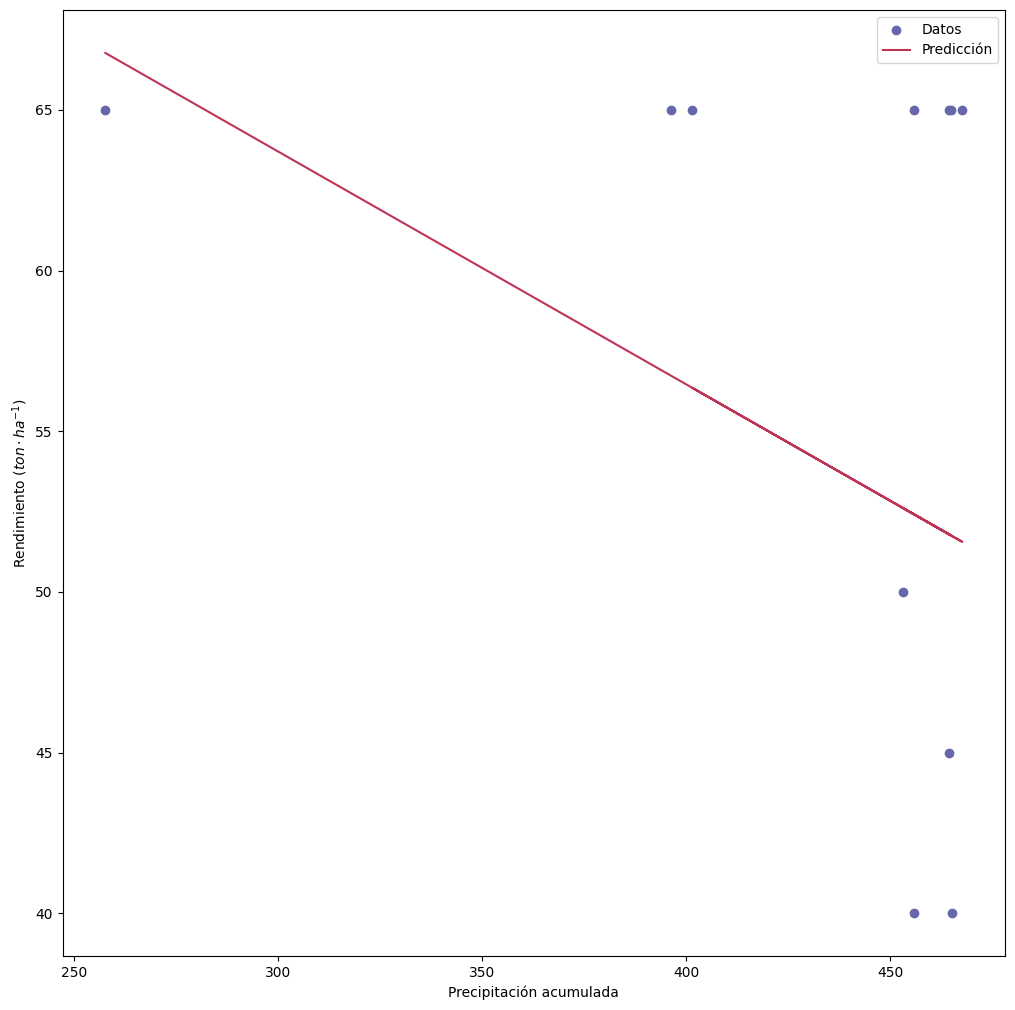

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(rl23_m['lluvia_acum'], rl23_m['rendimiento'], color='#6667AB', label='Datos')
plt.plot(rl23_m['lluvia_acum'], rl23_m['lluvia_acum_pred'], color='#BE3455', label='Predicción')
plt.tight_layout()
plt.legend()
plt.xlabel('Precipitación acumulada')
plt.ylabel('Rendimiento ($ton \cdot ha^{-1}$)')
plt.savefig(r'../../tesis_img/yield_new/lluvia_acum_23_m.pdf', dpi=150)
plt.show()

### latex

In [48]:
rl23_r[['parcela', 'rendimiento', 'ndvi_max_pred', 'ndvi_mean_pred','gndvi_max_pred', 'gndvi_mean_pred', 'cire_max_pred', 'cire_mean_pred', 'ndre1_max_pred', 'ndre1_mean_pred', 'msi_mean_pred']].to_latex(float_format="%.3f")

'\\begin{tabular}{lrrrrrrrrrrr}\n\\toprule\n & parcela & rendimiento & ndvi_max_pred & ndvi_mean_pred & gndvi_max_pred & gndvi_mean_pred & cire_max_pred & cire_mean_pred & ndre1_max_pred & ndre1_mean_pred & msi_mean_pred \\\\\n\\midrule\n0 & 10 & 65 & 55.816 & 50.340 & 56.421 & 51.826 & 54.663 & 53.158 & 55.569 & 50.032 & 48.180 \\\\\n1 & 11 & 40 & 56.968 & 51.419 & 58.183 & 51.419 & 58.626 & 52.271 & 58.647 & 48.611 & 44.993 \\\\\n2 & 13 & 40 & 50.698 & 55.706 & 47.718 & 56.215 & 49.539 & 55.598 & 48.614 & 56.916 & 56.055 \\\\\n3 & 15 & 45 & 54.570 & 53.526 & 53.396 & 53.711 & 51.898 & 54.398 & 52.205 & 53.035 & 49.163 \\\\\n4 & 2 & 50 & 52.485 & 56.000 & 49.576 & 55.013 & 50.874 & 55.144 & 50.962 & 55.583 & 55.339 \\\\\n5 & 3 & 65 & 53.811 & 56.299 & 53.160 & 55.767 & 54.994 & 55.193 & 55.179 & 57.320 & 59.364 \\\\\n6 & 4 & 65 & 52.698 & 56.209 & 52.232 & 55.808 & 52.537 & 55.401 & 52.568 & 57.426 & 59.736 \\\\\n7 & 5 & 65 & 58.528 & 52.566 & 62.247 & 53.532 & 61.300 & 53.808 & 61.45